In [142]:
#LOAN STATUS PREDICTION
#BY BENSON KARANJA
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [143]:
df=pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [145]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [146]:
df.shape

(614, 13)

In [147]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [148]:
df1=df.dropna()

In [149]:
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [150]:
df1.shape

(480, 13)

In [151]:
df1.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [152]:
df1['Dependents'].unique

<bound method Series.unique of 1       1
2       0
3       0
4       0
5       2
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 480, dtype: object>

In [153]:
df1.drop(['Loan_ID','CoapplicantIncome'],axis=1,inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y


In [154]:
#Data Encoding
le=LabelEncoder()
col_to_encode=(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])
for col in col_to_encode:
    df1[col] = le.fit_transform(df1[col])

In [155]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,187.0,360.0,1.0,2,1


In [156]:
df1.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
ApplicantIncome     405
LoanAmount          186
Loan_Amount_Term      9
Credit_History        2
Property_Area         3
Loan_Status           2
dtype: int64

In [157]:
df1.loc[df1['Dependents']=='3+']=3

In [158]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,267.0,360.0,1.0,2,1


In [159]:
y=df1['Loan_Status']
x=df1[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    3
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# **MODEL BUILDING**

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [161]:


param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10],
                 'penalty': ['l1', 'l2'],
                'max_iter':[100]}

param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}

param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}
models = {
    'Logistic Regression': {'model': LogisticRegression(), 'param_grid': param_grid_lr},
    'Support Vector Machine': {'model': SVC(), 'param_grid': param_grid_svc},
    'Random Forest': {'model': RandomForestClassifier(), 'param_grid': param_grid_rf},
    'Decision Tree': {'model': DecisionTreeClassifier(), 'param_grid': param_grid_dt},
    'K-Nearest Neighbors': {'model': KNeighborsClassifier(), 'param_grid': param_grid_knn}
}
for model_name, model_params in models.items():
    print(f"Tuning {model_name}")
    grid_search = GridSearchCV(model_params['model'], model_params['param_grid'], cv=5)
    grid_search.fit(x_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

Tuning Logistic Regression
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best score for Logistic Regression: 0.8333187006145742
Tuning Support Vector Machine
Best parameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Best score for Support Vector Machine: 0.8154521510096575
Tuning Random Forest
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.8392888498683055
Tuning Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best score for Decision Tree: 0.8154521510096575
Tuning K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best score for K-Nearest Neighbors: 0.7323090430201932


In [163]:
model=RandomForestClassifier(max_depth= 5,min_samples_split=2,n_estimators=300)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [164]:
model.score(x_train,y_train)

0.8511904761904762

In [165]:
model.score(x_test,y_test)

0.7986111111111112

In [170]:
predictions=model.predict (x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[23, 27,  0],
       [ 2, 85,  0],
       [ 0,  0,  7]])

<Axes: >

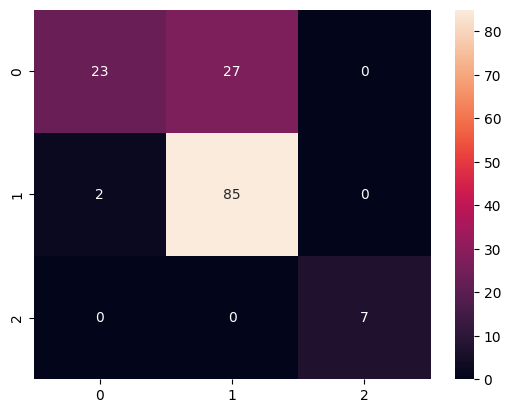

In [172]:
import seaborn as sns
sns.heatmap(cm, annot=True)

**Therefore, the Random Forest Classifier is the best given the data because it has a higher accuracy score!**# 